In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import pygsp
from tqdm import tqdm
import torch
from torch import optim
import spectral_denoiser as sd

# Load Image and Create Graph

In [2]:
N = 100
noodle = Image.open("noodle.jpg").resize((N,N))
noodle_array = np.asarray(noodle)
noodle_cropped = noodle_array
G = pygsp.graphs.Grid2d(N)

# Create an Instance

In [3]:
denoiser = sd.Spectral_Denoiser(G)

# Gaussian Noise

In [4]:
noodle_gray = np.mean(noodle_cropped, axis = 2)
f_tilde = noodle_gray.reshape(-1) + 50*np.random.randn(N*N)

2022-11-30 09:26:20,252:[WARNING](pygsp.graphs.graph.lmax): The largest eigenvalue G.lmax is not available, we need to estimate it. Explicitly call G.estimate_lmax() or G.compute_fourier_basis() once beforehand to suppress the warning.


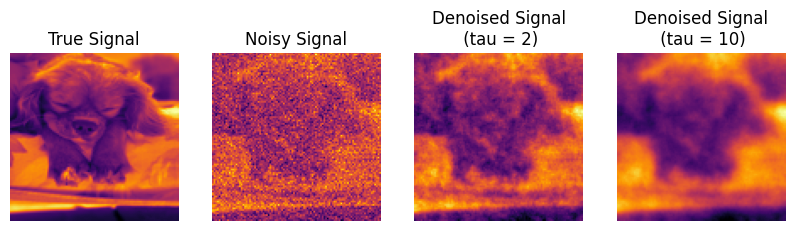

In [5]:
fig, ax = plt.subplots(1,4,figsize=(10,40))
ax[0].imshow(noodle_gray.reshape(N,N), cmap = 'inferno')
ax[0].set_title("True Signal")
ax[0].axis("off")

ax[1].imshow(f_tilde.reshape(N,N), cmap = 'inferno')
ax[1].set_title("Noisy Signal")
ax[1].axis("off")

f_check = denoiser.remove_gaussian_noise(f_tilde,tau=2)
ax[2].imshow(f_check.reshape(N,N), cmap = 'inferno')
ax[2].set_title("Denoised Signal\n (tau = 2)")
ax[2].axis("off")

f_check = denoiser.remove_gaussian_noise(f_tilde,tau=10)
ax[3].imshow(f_check.reshape(N,N), cmap = 'inferno')
ax[3].set_title("Denoised Signal\n (tau = 10)")
ax[3].axis("off")
plt.show()

# Bernoulli Noise

In [6]:
z = 1*(np.random.randn(N,N) > 2)
noodle_gray = np.mean(noodle_cropped, axis = 2)
f_tilde = z*noodle_gray

In [7]:
denoised = denoiser.remove_bernoulli_noise(f_tilde,method='exact')

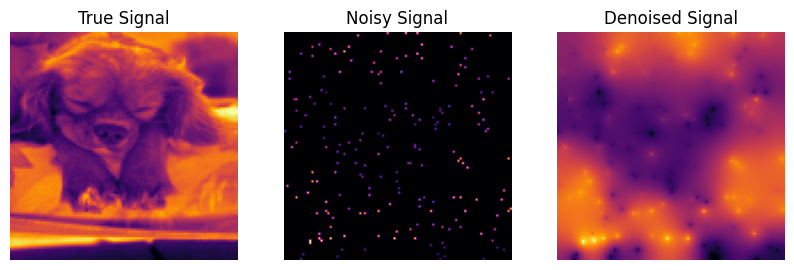

In [8]:
fig, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(noodle_gray.reshape(N,N), cmap = 'inferno')
ax[0].set_title("True Signal")
ax[0].axis("off")

ax[1].imshow(f_tilde, cmap = 'inferno')
ax[1].set_title("Noisy Signal")
ax[1].axis("off")

ax[2].imshow(denoised.reshape(N,N), cmap = 'inferno')
ax[2].set_title("Denoised Signal")
ax[2].axis("off")
plt.show()

In [9]:
denoised_10 = denoiser.remove_bernoulli_noise(f_tilde, time = 10, method = 'approximate')
denoised_200 = denoiser.remove_bernoulli_noise(f_tilde, time = 200, method = 'approximate')
denoised_1000 = denoiser.remove_bernoulli_noise(f_tilde, time = 1000, method = 'approximate')

100%|███████████████████████████████████████| 1000/1000 [00:42<00:00, 23.45it/s]


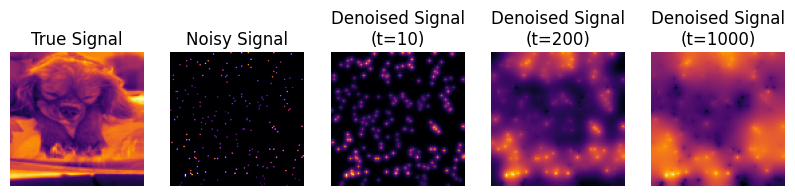

In [10]:
fig, ax = plt.subplots(1,5,figsize=(10,30))
ax[0].imshow(noodle_gray.reshape(N,N), cmap = 'inferno')
ax[0].set_title("True Signal")
ax[0].axis("off")

ax[1].imshow(f_tilde.reshape(N,N), cmap = 'inferno')
ax[1].set_title("Noisy Signal")
ax[1].axis("off")

ax[2].imshow(denoised_10.reshape(N,N), cmap = 'inferno')
ax[2].set_title("Denoised Signal\n(t=10)")
ax[2].axis("off")


ax[3].imshow(denoised_200.reshape(N,N), cmap = 'inferno')
ax[3].set_title("Denoised Signal\n(t=200)")
ax[3].axis("off")

ax[4].imshow(denoised_1000.reshape(N,N), cmap = 'inferno')
ax[4].set_title("Denoised Signal\n(t=1000)")
ax[4].axis("off")
plt.show()

# Uniform Noise

In [11]:
f_tilde = noodle_gray.reshape(-1) * np.random.uniform(0,1,G.N)

In [12]:
f_check = denoiser.remove_uniform_noise(f_tilde,alpha=1,beta=1,gamma=1, lr = 5, MAX_ITER=1000)

/Users/samuelleone/Documents/GitHub/Spectral-Denoising/spectral_denoiser.py:162: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(signal.clone().detach(), requires_grad = True)
100%|███████████████████████████████████████| 1000/1000 [02:02<00:00,  8.13it/s]


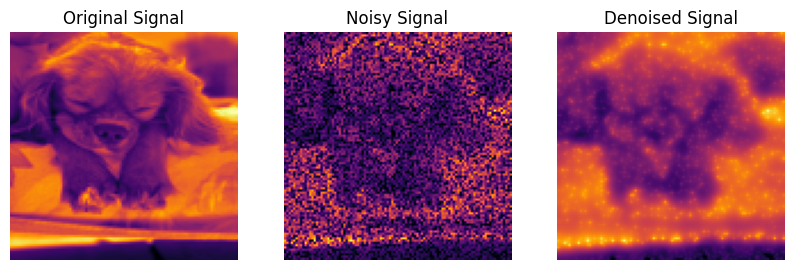

In [13]:
fig, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(noodle_gray,cmap='inferno')
ax[0].set_title("Original Signal")
ax[1].imshow(f_tilde.reshape(N,N),cmap='inferno')
ax[1].set_title("Noisy Signal")
ax[2].imshow(f_check.reshape(N,N),cmap='inferno')
ax[2].set_title("Denoised Signal")
ax[0].axis("off"); ax[1].axis("off"); ax[2].axis("off");
plt.show()

## No Distance Reweighting

In [14]:
import importlib
importlib.reload(sd)
denoiser = sd.Spectral_Denoiser(G)

In [15]:
f_check = denoiser.remove_uniform_noise(f_tilde,alpha=1,beta=1,gamma=0, lr = 5, MAX_ITER=1000)

 31%|████████████▎                           | 307/1000 [00:22<00:51, 13.38it/s]


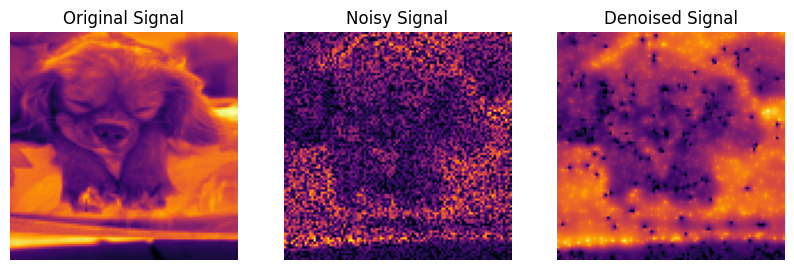

In [17]:
fig, ax = plt.subplots(1,3,figsize=(10,30))
ax[0].imshow(noodle_gray,cmap='inferno')
ax[0].set_title("Original Signal")
ax[1].imshow(f_tilde.reshape(N,N),cmap='inferno')
ax[1].set_title("Noisy Signal")
ax[2].imshow(f_check.reshape(N,N),cmap='inferno')
ax[2].set_title("Denoised Signal")
ax[0].axis("off"); ax[1].axis("off"); ax[2].axis("off");
plt.show()